In [1]:
import numpy as np
import random as rd
import scipy as sp

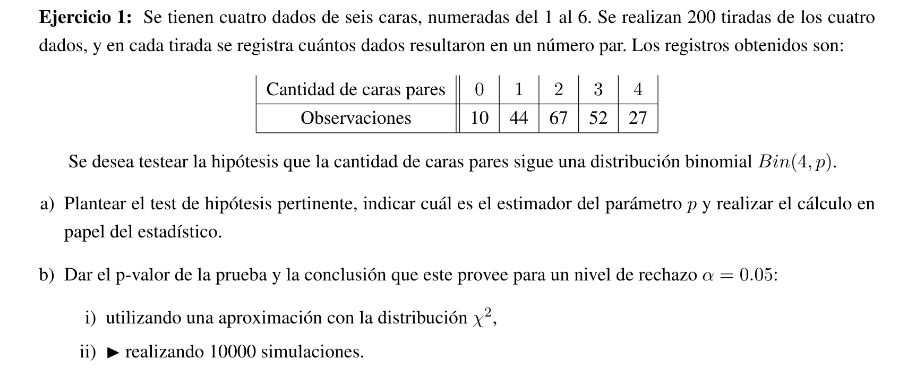

Mi estimador para p es:
$$
\hat{p} = 0.5525
$$

Ahora calculo:
$$
P(X = i) = \binom{4}{i} \hat{p}^i (1 - \hat{p})^{4 - i} \\
\text{para } i = 0, 1, 2, 3, 4
$$

In [2]:
p_hat = 0.5525
p_0 = sp.stats.binom.pmf(0, 4, p_hat)
p_1 = sp.stats.binom.pmf(1, 4, p_hat)
p_2 = sp.stats.binom.pmf(2, 4, p_hat)
p_3 = sp.stats.binom.pmf(3, 4, p_hat)
p_4 = sp.stats.binom.pmf(4, 4, p_hat)

pi = [p_0, p_1, p_2, p_3, p_4]
Ni = [10,44,67,52,27]
n = sum(Ni)

In [3]:
def estadistico(n, pi,Ni):
    t = 0
    for i in range(len(Ni)):
        t += ((Ni[i] - n*pi[i])**2)/(n*pi[i])
    return t


def calcular_pvalor_param(t, k, m):
    return 1 - sp.stats.chi2.cdf(t, k-1-m)

In [4]:
t = estadistico(n, pi, Ni)
print(t)

6.441878945232579


In [5]:
calcular_pvalor_param(t, 5, 1)

0.0919830530914566

Como el p-valor es > 0.05, no rechazo la hipótesis nula.

Recalculo el p-valor usando simulaciones

In [6]:
def gen_muestra_bin(N, n, p):
    return [sp.stats.binom.rvs(n, p) for i in range(N)]

In [7]:
"""  
Simula el p-valor de un contraste de bondad de ajuste para la distribución binomial.

Parametros:
nsims -- número de simulaciones
n -- tamaño de la muestra
pi -- vector de probabilidades
Ni -- vector de frecuencias
"""
def simular_p_valor(nsims, n, pi, Ni, p_hat):
    t = estadistico(n, pi, Ni)
    print(n)
    print(t)
    hits = 0
    pi_sim = [0,0,0,0,0]
    Ni_sim = [0,0,0,0,0]
    for i in range(nsims):
        muestra = gen_muestra_bin(n, 4, p_hat)
        # estimo el parametro p a partir de esta nueva muestra, E[x] = n.p -> p = E[x]/n , n = 4
        p_hat_sim = np.mean(muestra)/4
        #print(p_hat_sim)
        pi_sim[0] = sp.stats.binom.pmf(0, 4, p_hat_sim)
        pi_sim[1] = sp.stats.binom.pmf(1, 4, p_hat_sim)
        pi_sim[2] = sp.stats.binom.pmf(2, 4, p_hat_sim)
        pi_sim[3] = sp.stats.binom.pmf(3, 4, p_hat_sim)
        pi_sim[4] = sp.stats.binom.pmf(4, 4, p_hat_sim)
        Ni_sim = np.unique(muestra, return_counts=True)[1]
        #print(pi_sim)
        #print(Ni_sim)
        t_sim = estadistico(n, pi_sim, Ni_sim)
        if t_sim >= t:
            hits += 1

    return hits/nsims

In [8]:
#simular_p_valor(10000, n, pi, Ni, p_hat)

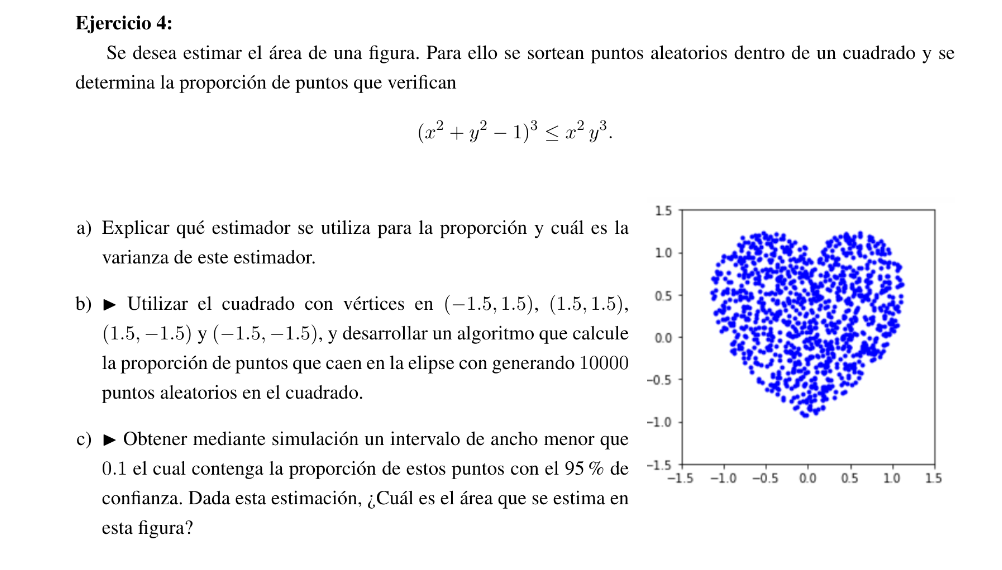

En este caso podemos ver que la proporcion de puntos en el rectangulo (-1.5, 1.5)(1.5, 1.5)(1.5,-1.5)(-1.5,-1.5) que evaluados en $(x^2 + y^2 -1)^3 \leq x^2y^3$ y satisfacen la condicion, es la esperanza de una variable bernoulli con p = a esa proporcion. Y la estimacion de una proporcion para una variable bernoulli es la **Media muestral** y el ECM para la media muestral es: $\frac{\sigma^2}{n}$ que puede tambien ser estimado por $\frac{S^2(n)}{n}$

Y el estimador para $\sigma^2$ es: $\overline{X}(n)(1- \overline{X}(n))$

Y el ECM de $\overline{X}(n)$ es: $\frac{\overline{X}(n)(1- \overline{X}(n))}{n}$

In [9]:
def en_elipse():
    x = rd.uniform(-1.5, 1.5)
    y = rd.uniform(-1.5, 1.5)

    return (x**2 + y**2 -1)**3 <= x**2 * y**3
    
def estimar_prop(nsims):
    hits = 0
    for i in range(nsims):
        hits += en_elipse()
    return hits/nsims

In [25]:
print(estimar_prop(10000))

0.4134


In [26]:
def intervalo_proporcion(z_alfa_2, L):
    'Confianza = 1 - alfa, ampliud del intervalo = L'
    d = L/(2*z_alfa_2)
    p = 0
    n = 0
    while n <= 100 or np.sqrt(p * (1-p)/n) > d:
        n += 1
        X = en_elipse()
        p = p + (X - p)/n
    s2 = p*(1-p)
    izq = p - z_alfa_2*np.sqrt(s2/n)
    der = p + z_alfa_2*np.sqrt(s2/n)
    intervalo = (round(izq,4), round(der,4))
    return p, s2, n, intervalo

In [68]:
intervalo_proporcion(1.96, 0.1)

(0.4070080862533693, 0.24135250397773916, 371, (0.357, 0.457))